# Reports data EDA

### About the data

The dataset contains sales-related information for a range of **football socks** (from the adidas brand), differentiated by **product color and size**, covering multiple years.

Each row represents a unique combination of product **color** (identified by index), **size**, and **year**, along with a set of sales and inventory metrics. The dataset is synthetic but structured to resemble realistic retail data. It was generated for the purpose of **exploratory data analysis (EDA)** and building **predictive machine learning models** (e.g., forecasting future sales or demand).

The dataset spans **12 product colors** and **8 sizes** (from KXXL to XS) for the years **2022 to 2027**, enabling time-based trend analysis and modeling.

### Columns:
* **`INDEX`** – Unique identifier of the product (varies by color)  
* **`BRAND`** – Product brand (fixed: adidas)  
* **`CATEGORY LVL1`** – Product category (fixed: TEKSTYLIA)  
* **`SIZE`** – Sock size (e.g., KXXL, XS, M, etc.)  
* **`Sales Net PLN`** – Net revenue from sales (in PLN)  
* **`Sales in COGS PLN`** – Cost of goods sold (in PLN)  
* **`Sales Margin PLN`** – Gross profit: Sales Net minus COGS  
* **`Sales Margin %`** – Gross margin expressed as a percentage  
* **`WOH 4W`** – Weeks of stock on hand (last 4 weeks)  
* **`WOH 13W`** – Weeks of stock on hand (last 13 weeks)  
* **`Stock Value PLN`** – Value of inventory (in PLN)  
* **`Stock Quantity`** – Number of items currently in stock  
* **`Units Sold`** – Number of units sold in the given year  
* **`Return Ratio`** – Ratio of returned products to units sold (percentage)  
* **`Year of Sales`** – Year the sale occurred  


In [9]:
import pandas as pd
import openpyxl
import seaborn as sns
import itables
from itables import show

df = pd.read_excel('synth_sales_milanosocks_2022-2025.xlsx', sheet_name='2022')
#df.head(10)

show(
    df,
    maxBytes=0,              
    lengthMenu=[10, 25, 50],
    paging=True,             
    scrollX=True,            
    columnDefs=[
        {"width": "150px", "targets": "_all"}
    ]
)

Loading ITables v2.4.4 from the internet... (need help?)


## Eksploratory data analysis:
#### 1. Data overview
- random records

In [4]:
df.sample(30)

,INDEX,BRAND,CATEGORY LVL1,SIZE,Sales Net PLN,Sales in COGS PLN,Sales Margin PLN,Sales Margin %,WOH 4W,WOH 13W,Stock Value PLN,Stock Quantity,Units Sold,Return Ratio,Year of Sales
13,IB7813,adidas,TEKSTYLIA,L,8247.540000,5993.98,2253.560000,27.3%,30.4,23.3,804.8588,354.0,364,2.9%,2022
16,IB7814,adidas,TEKSTYLIA,KXXL,8961.310000,5378.17,3583.140000,40.0%,7.2,8.6,6815.8945,533.0,131,1.3%,2022
31,IB7821,adidas,TEKSTYLIA,XXL,4996.610000,3977.19,1019.420000,20.4%,44.5,47.6,7624.6489,586.0,258,3.2%,2022
3,HT6538,adidas,TEKSTYLIA,S,11153.100000,7021.49,4131.610000,37.0%,1.1,0.9,8414.7167,41.0,297,4.6%,2022
94,IB7823,adidas,TEKSTYLIA,XL,10391.630000,6042.60,4349.030000,41.9%,27.5,20.0,5949.2785,336.0,180,3.1%,2022
30,IB7821,adidas,TEKSTYLIA,XL,2290.360000,1609.22,681.140000,29.7%,19.4,15.6,6964.0698,770.0,218,2.6%,2022
57,IB7815,adidas,TEKSTYLIA,KXL,14568.340000,9354.50,5213.840000,35.8%,38.0,55.1,12489.0103,409.0,398,NaN,2022
64,IB7822,adidas,TEKSTYLIA,KXXL,14095.350000,8859.26,5236.090000,37.1%,7.9,NaN,11248.0204,386.0,396,3.0%,2022
4,HT6538,adidas,TEKSTYLIA,M,9958.950000,7658.82,2300.130000,23.1%,20.3,22.3,3619.5960,340.0,1776,1.6%,2022
42,IB7817,adidas,TEKSTYLIA,XS,4339.370000,2994.01,1345.360000,31.0%,17.6,18.4,5779.7185,773.0,564,NaN,2022


- unique values

In [5]:
df.nunique()

INDEX                12
BRAND                 1
CATEGORY LVL1         1
SIZE                  8
Sales Net PLN        96
Sales in COGS PLN    96
Sales Margin PLN     96
Sales Margin %       78
WOH 4W               87
WOH 13W              86
Stock Value PLN      96
Stock Quantity       88
Units Sold           83
Return Ratio         42
Year of Sales         1
dtype: int64

#### 2. Missing values analysis

In [6]:
df.isnull().sum()

INDEX                 0
BRAND                 0
CATEGORY LVL1         0
SIZE                  0
Sales Net PLN         0
Sales in COGS PLN     0
Sales Margin PLN      0
Sales Margin %        0
WOH 4W                0
WOH 13W               6
Stock Value PLN       0
Stock Quantity        3
Units Sold            0
Return Ratio         12
Year of Sales         0
dtype: int64

Missing values in columns...
* 

#### 3. Individual variables analysis
* histograms


array([[<Axes: title={'center': 'Sales Net PLN'}>,
        <Axes: title={'center': 'Sales in COGS PLN'}>,
        <Axes: title={'center': 'Sales Margin PLN'}>],
       [<Axes: title={'center': 'WOH 4W'}>,
        <Axes: title={'center': 'WOH 13W'}>,
        <Axes: title={'center': 'Stock Value PLN'}>],
       [<Axes: title={'center': 'Stock Quantity'}>,
        <Axes: title={'center': 'Units Sold'}>,
        <Axes: title={'center': 'Year of Sales'}>]], dtype=object)

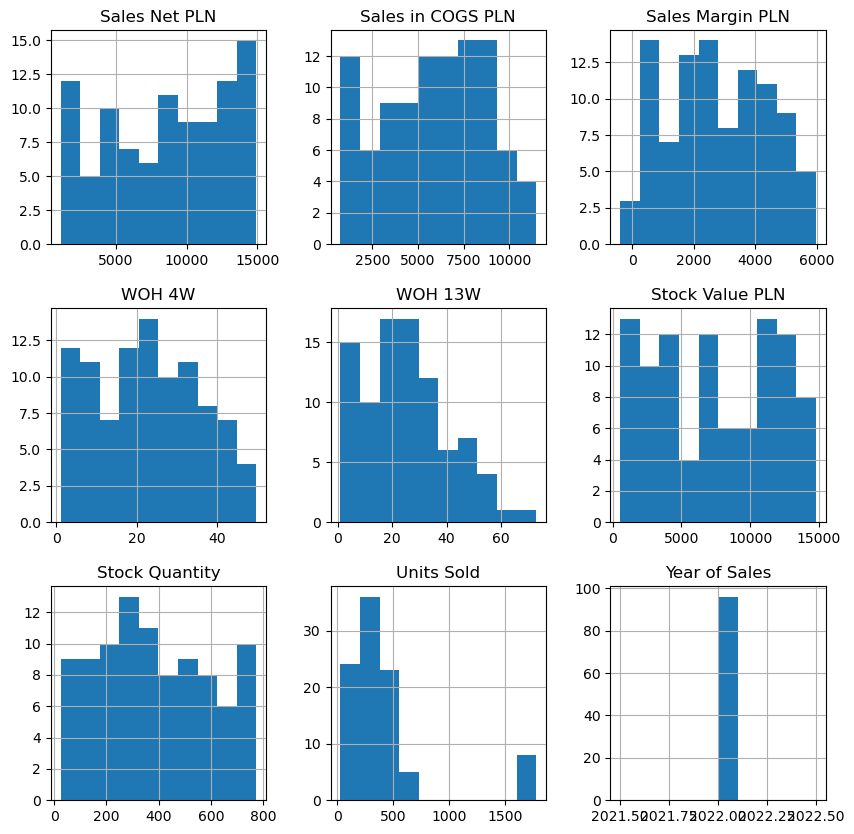

In [10]:
df.hist(figsize = (10, 10))

Conclusions...
* 

#### 4. Data transformations
* outlayers?
* missing values (ratio)
* ...

#### 5. Features correlation analysis
* ...

<Axes: >

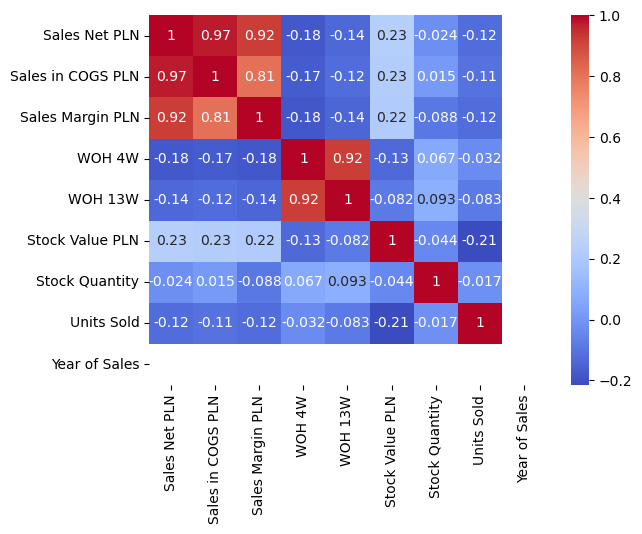

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")